# Project: Exploratory Data Analysis of a Supermarket Sales Dataset
 Objective   
 
 Analyze supermarket sales data to gain insights into product performance, customer behavior, and sales trends.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')


In [5]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'])

C:\Users\Seye-W\AppData\Local\Temp\ipykernel_976\2029396998.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


In [8]:
customer_type_counts = df['Product line'].value_counts()

labels = customer_type_counts.index
sizes = customer_type_counts.values
print(sizes)

[178 174 170 166 160 152]


In [9]:
print(df.isnull().sum())
print(df.info())


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender           

# Sales by Product Line
### . Bar Chart Showing total sales or quantity sold for each product line.
### . Pie Chart Displaying the sales distribution by product line.

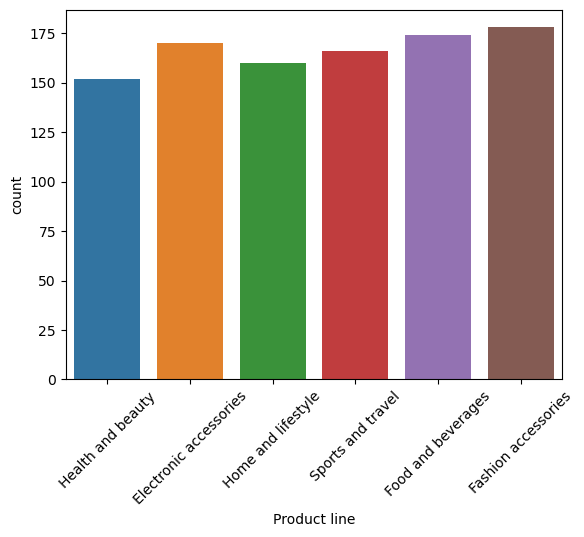

In [10]:
sns.countplot(data=df, x='Product line')
plt.xticks(rotation= 45)
plt.show()


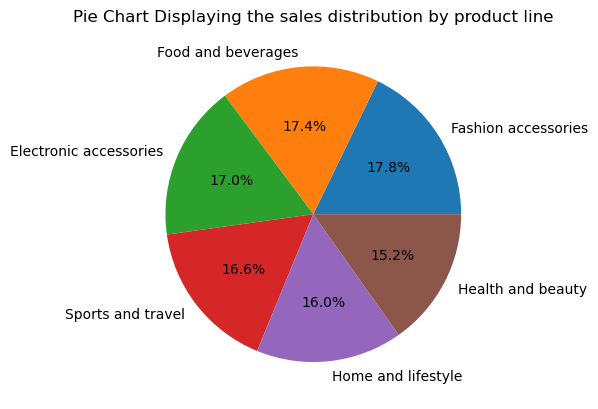

In [11]:
fig,ax=plt.subplots()
ax.pie(sizes, labels=labels,autopct='%1.1f%%')
ax.set_title('Pie Chart Displaying the sales distribution by product line')
plt.show()

# Sales by Branch and City

## Bar Chart Comparing total sales or quantity across branches and cities.
## Heatmap Displaying sale distribution across branches and cities.

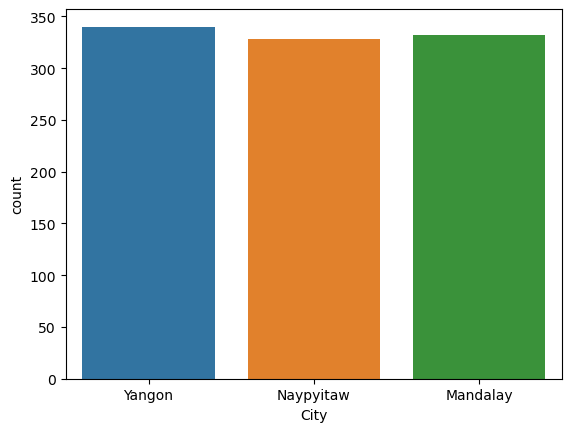

In [12]:
sns.countplot(data=df, x= 'City')
plt.show()

In [13]:
branch_vs_productline = df.groupby(['Branch','Product line'])['Total'].sum().unstack()
print(branch_vs_productline)

Product line  Electronic accessories  Fashion accessories  Food and beverages  \
Branch                                                                          
A                         18317.1135           16332.5085          17163.1005   
B                         17051.4435           16413.3165          15214.8885   
C                         18968.9745           21560.0700          23766.8550   

Product line  Health and beauty  Home and lifestyle  Sports and travel  
Branch                                                                  
A                     12597.753          22417.1955         19372.6995  
B                     19980.660          17549.1645         19988.1990  
C                     16615.326          13895.5530         15761.9280  


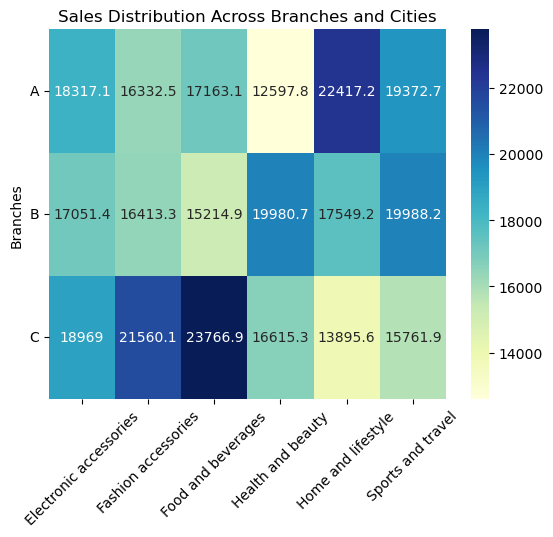

In [14]:
sns.heatmap(branch_vs_productline, annot=True, cmap='YlGnBu', cbar=True, fmt='g')

plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Sales Distribution Across Branches and Cities')
plt.xlabel('')
plt.ylabel('Branches')
plt.show()

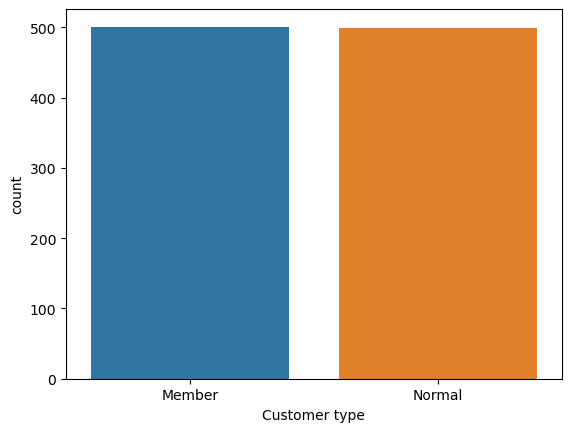

In [15]:
sns.countplot(data=df, x='Customer type')
plt.show()

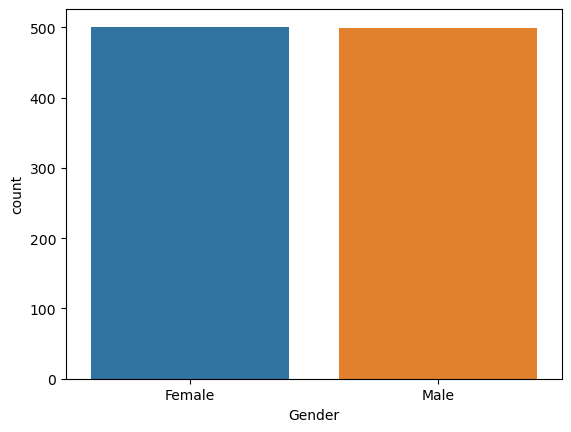

In [16]:
sns.countplot( data=df, x='Gender')
plt.show()

# Sales Over Time

* Line Chart: Plot sales over days (using the "Date" column).
* Hourly Sales Heatmap: Use the "Time" column to show sales distribution across different hours of the day.

In [17]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2024-12-25 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2024-12-25 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2024-12-25 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2024-12-25 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2024-12-25 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


c:\Users\Seye-W\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


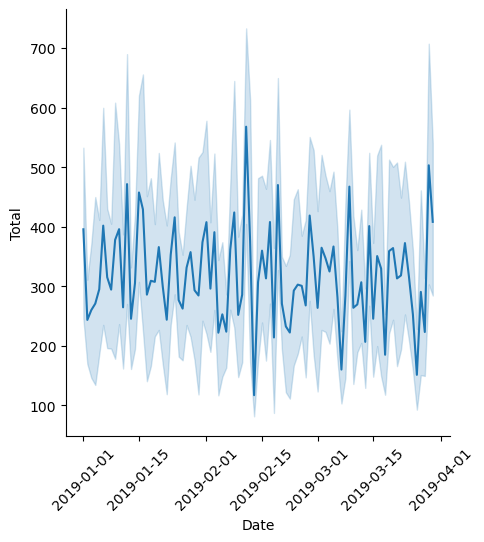

In [18]:
sns.relplot(x='Date',y='Total',data= df, kind='line')
plt.xticks(rotation=45)
plt.show()

## Sales by Payment Method

* Pie Chart or Bar Chart: Show distribution of sales across payment methods (e.g., Cash, Credit, etc.).

In [19]:
customer_payment= df['Payment'].value_counts()
print(customer_payment)

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64


In [20]:
payment_labels= customer_payment.index
payment= customer_payment.values
print(payment)
print(payment_labels)

[345 344 311]
Index(['Ewallet', 'Cash', 'Credit card'], dtype='object', name='Payment')


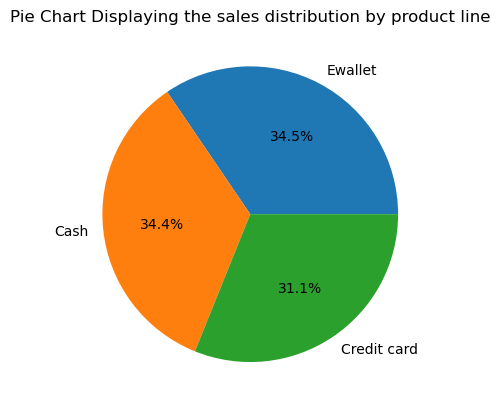

In [21]:
fig,ax=plt.subplots()
ax.pie(payment, labels=payment_labels,autopct='%.1f%%')
ax.set_title('Pie Chart Displaying the sales distribution by product line')
plt.show()

# Quantity vs. Total Sales

* Scatter Plot: Show the relationship between quantity sold and total sales for different transactions.

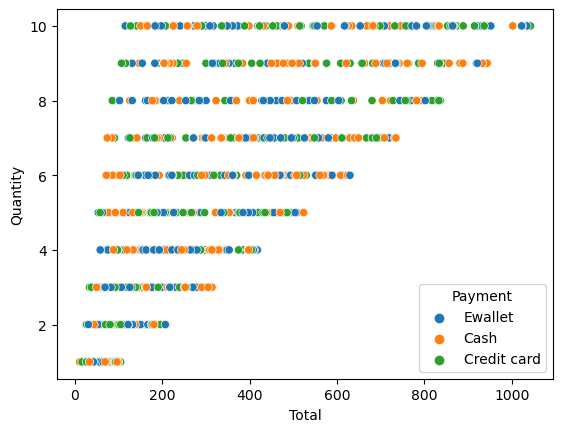

In [22]:
total_sales=df['Total']
quantity=df['Quantity']
payment=df['Payment']
sns.scatterplot(data=df,x=total_sales,y=quantity,hue=payment )
plt.show()

# Gross Income by Product Line

* Bar Chart: Compare gross income for each product line to see which are most profitable.

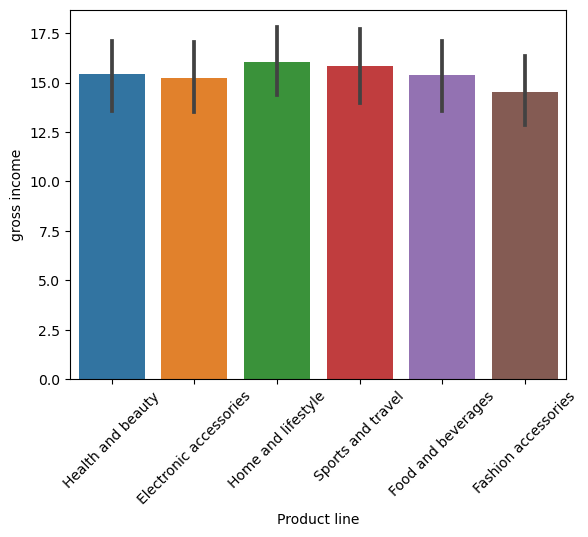

In [23]:
sns.barplot(data=df, x='Product line', y='gross income')
plt.xticks(rotation=45)
plt.show()

Average Rating by Product Line

Box Plot: Display average ratings for each product line to understand customer satisfaction.

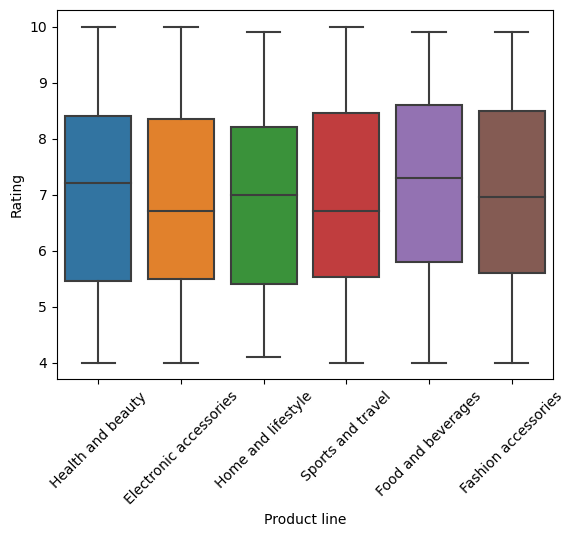

In [24]:
sns.boxplot(data=df,x='Product line', y= 'Rating')
plt.xticks(rotation=45)
plt.show()

## Unit Price Distribution by Product Line

* Violin Plot: Compare unit price ranges within each product line.

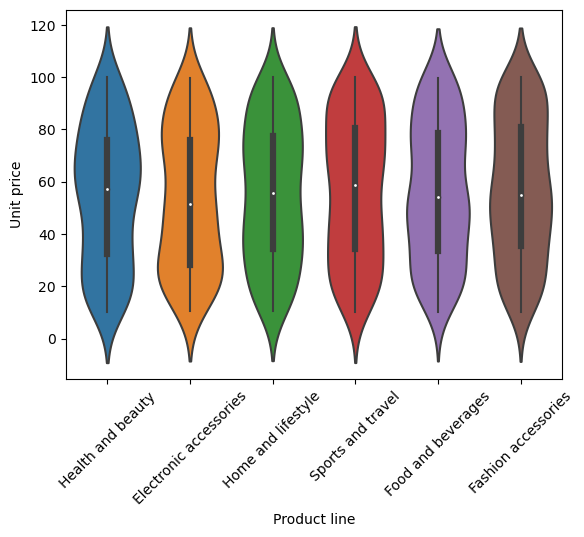

In [25]:
sns.violinplot(data=df, x='Product line' ,y= 'Unit price')
plt.xticks(rotation=45)
plt.show()

## Total Sales per Invoice ID

* Histogram: Display the distribution of total sales


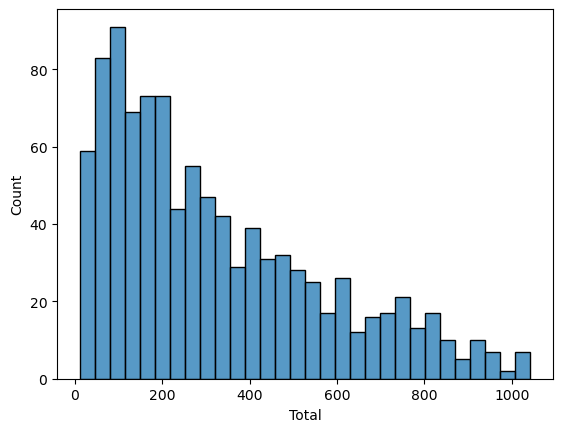

In [27]:
sns.histplot(data=df, x='Total', bins=30,cbar=True, cbar_kws=(dict(shrink=.75)))
plt.show()

## Customer Type and Rating

* Violin Plot Showing the rating distribution for each customer type.

In [36]:
grouped_dataset=df.groupby('Customer type')['Rating'].sum()
print(grouped_dataset)

Customer type
Member    3477.1
Normal    3495.6
Name: Rating, dtype: float64


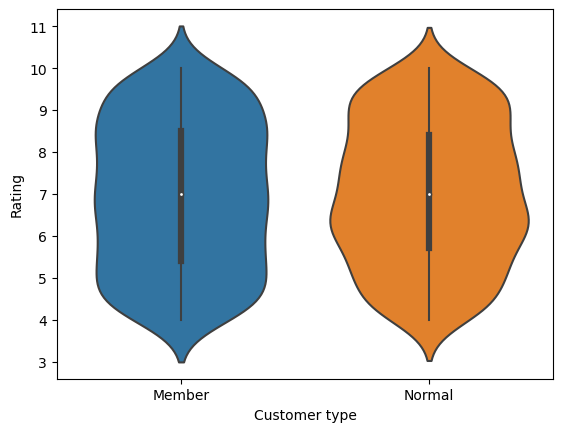

In [39]:
sns.violinplot(data=df,x='Customer type', y='Rating' )
plt.show()

## Branch vs. Gross Income

* Bar Chart: Comparing gross income across different branches to see which branch is more profitable.

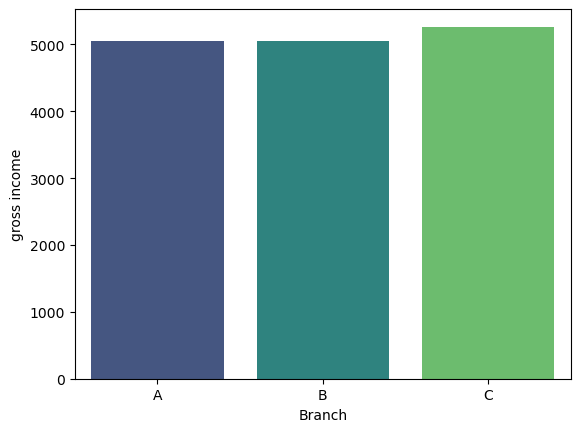

In [41]:
branch_gross_income = df.groupby('Branch')['gross income'].sum().reset_index()
sns.barplot(data=branch_gross_income, x='Branch', y='gross income', palette='viridis')
plt.show()